In [74]:
import pandas as pd

from pandas import DataFrame as df
import numpy as np
import csv
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity 
import pickle
import keras
from keras.preprocessing import sequence
from keras.layers import Input, Dense, Embedding, Reshape, Dot
from keras.models import Model 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

In [80]:
phy_dists = pd.read_csv("data/AG_new/phy_dists.txt", sep = " ", index_col=0)

#dict_file = open("dictionary.obj", "rb")
#dictionary = pickle.load(dict_file)

#revdict_file = open("reverse_dictionary.obj", "rb")
#reverse_dictionary = pickle.load(revdict_file)

#vocab_size = len(dictionary)
#Dictionary goes [taxa: int_id]
#Reverse dictionary goes [int_id: taxa]

def getPhyDist(id_1, id_2):
    return(phy_dists[id_1][id_2])

In [72]:
qual_vecs = pd.read_csv("data/AG_new/qual_vecs.csv", sep = ",", index_col = 0)
#qual_vecs = qual_vecs.drop("<unk>", axis = 0)
qual_vecs.head()


,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
OTU,,,,,,,,,,,,,,,,,,,,,
86,-0.185071,-0.060565,0.052552,-0.392560,0.337586,0.488152,0.598761,-0.155930,-0.332831,0.005900,...,-0.097103,-0.055349,0.118009,-0.359693,-0.299387,0.129834,0.277123,0.219357,-0.475099,-0.098607
1395,0.323180,-0.065621,-0.078887,0.265576,-0.069829,0.272359,0.070103,0.166259,0.548922,0.023953,...,0.085404,0.001996,0.270297,0.337669,0.107999,0.149919,-0.341643,-0.132062,-0.004378,-0.059115
1410,-0.073248,0.135933,0.177498,-0.026104,0.134329,-0.503527,0.212796,-0.456703,-0.089182,0.134927,...,0.298838,-0.655798,0.345590,0.255344,-0.104861,0.187529,-0.150374,0.279488,-0.308947,0.223049
1591,-0.263228,0.120259,0.113141,-0.454696,0.068078,-0.280778,0.104846,-0.173005,-0.108848,0.119961,...,0.251851,-0.364213,-0.115501,0.226456,0.033975,0.383390,-0.123621,0.125305,-0.123057,-0.328628
1808,0.407858,-0.123061,0.078027,0.260151,-0.126438,0.116737,-0.076542,-0.013532,0.712911,0.058485,...,0.096293,0.204537,0.435086,0.443106,0.176025,0.205586,-0.261930,-0.206021,-0.124262,0.012309


In [73]:
#qual_vecs_sort = qual_vecs.reindex(sorted([str(i) for i in qual_vecs.index.values]))
qual_vecs_sort = qual_vecs.sort_index(axis = 0)
qual_vecs_sort.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
OTU,,,,,,,,,,,,,,,,,,,,,
86,-0.185071,-0.060565,0.052552,-0.392560,0.337586,0.488152,0.598761,-0.155930,-0.332831,0.005900,...,-0.097103,-0.055349,0.118009,-0.359693,-0.299387,0.129834,0.277123,0.219357,-0.475099,-0.098607
1395,0.323180,-0.065621,-0.078887,0.265576,-0.069829,0.272359,0.070103,0.166259,0.548922,0.023953,...,0.085404,0.001996,0.270297,0.337669,0.107999,0.149919,-0.341643,-0.132062,-0.004378,-0.059115
1410,-0.073248,0.135933,0.177498,-0.026104,0.134329,-0.503527,0.212796,-0.456703,-0.089182,0.134927,...,0.298838,-0.655798,0.345590,0.255344,-0.104861,0.187529,-0.150374,0.279488,-0.308947,0.223049
1591,-0.263228,0.120259,0.113141,-0.454696,0.068078,-0.280778,0.104846,-0.173005,-0.108848,0.119961,...,0.251851,-0.364213,-0.115501,0.226456,0.033975,0.383390,-0.123621,0.125305,-0.123057,-0.328628
1808,0.407858,-0.123061,0.078027,0.260151,-0.126438,0.116737,-0.076542,-0.013532,0.712911,0.058485,...,0.096293,0.204537,0.435086,0.443106,0.176025,0.205586,-0.261930,-0.206021,-0.124262,0.012309


In [81]:
phy_dists_sort = pd.DataFrame(phy_dists, columns= [str(i) for i in phy_dists.columns.values])
phy_dists_sort.head()
#phy_dists_sort = phy_dists_sort[sorted(phy_dists_sort.columns)]


,77966,677966,152466,150477,3528445,547463,4438983,842598,152450,849440,...,529740,368261,1835779,4254528,191412,174415,4341194,573110,4128381,1868703
77966,0.00000,0.06182,0.07655,0.10025,0.10364,0.09287,0.10337,0.11908,0.12230,0.10662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677966,0.06182,0.00000,0.07319,0.09689,0.10028,0.08951,0.10001,0.11572,0.11894,0.10326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152466,0.07655,0.07319,0.00000,0.03120,0.03459,0.06910,0.07960,0.09531,0.09853,0.08285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150477,0.10025,0.09689,0.03120,0.00000,0.02595,0.09280,0.10330,0.11901,0.12223,0.10655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528445,0.10364,0.10028,0.03459,0.02595,0.00000,0.09619,0.10669,0.12240,0.12562,0.10994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
qual_vec_dists = pairwise_distances(qual_vecs, metric="cosine")

In [78]:
from sklearn.metrics import pairwise_distances
#qual_vec_dists = pairwise_distances(qual_vecs, metric="cosine")
taxa = qual_vecs.index.values
qual_vec_dists = pd.DataFrame(qual_vec_dists, index = taxa, columns = taxa)

In [82]:
keep = [phy_dists.index.values[i] in taxa for i in range(phy_dists.shape[0])]
phy_dists_keep = phy_dists_sort.loc[keep, taxa]

KeyError: 'None of [[     86    1395    1410 ... 4484352 4484382 4484389]] are in the [columns]'

In [ ]:
#Pick 1000 random rows
rand_row = np.random.choice(range(phy_dists.shape[0]), 10000)
phy_dists_small = phy_dists.iloc[rand_row, :]
qual_dists_small = qual_vec_dists.iloc[rand_row, :]
taxa = phy_dists_small.index.values

In [ ]:
#Turn matrices into vectors
phy_dists_vec = np.array([i for sublist in np.array(phy_dists_small) for i in sublist])
qual_dists_vec = np.array([i for sublist in np.array(qual_dists_small) for i in sublist])
taxa_pairs = np.array([(i, j) for i in phy_dists_small.index.values for j in phy_dists_small.columns.values])

In [ ]:
#Plot the relationship between phylogenetic distances and embedding distances
end_range = 100
x = phy_dists_vec[0:end_range]
y = qual_dists_vec[0:end_range]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line, color = '#')
plt.xlabel("Phylogenetic Distance")
plt.ylabel("Embedding Distance")

#Correlation
corr = pearsonr(x,y)
print("Pearson Coefficient: " + str(corr[0]))
print("Pearson P-value: " + str(corr[1]))

In [147]:
qual_dists_vec_neg = 0 - qual_dists_vec
add = qual_dists_vec_neg + phy_dists_vec
sort_ind = np.argsort(add)

In [150]:
numFeatures = 1500
i = 0
taxa_pairs_keep = []
taxa_keep = set()
numFeaturesSelected = 0
while numFeaturesSelected < numFeatures:
    pair = taxa_pairs[sort_ind[i]]
    taxa_keep.add(pair[0])
    taxa_keep.add(pair[1])
    numFeaturesSelected = len(taxa_keep)
    i = i + 1
    
print("Number of taxa: " + str(len(taxa_keep)))

Number of taxa: 1500


In [151]:

file = open("feature_selection/taxa_lowphy_highcos.obj", "wb")
pickle.dump(taxa_keep, file)
file.close()

Old code + graphing utility

In [13]:
slope = 1.1
intercept = 0.8
y = [slope * i + intercept for i in phy]



In [65]:
keep = [cosine[i] > y[i] for i in range(len(phy))]

taxa_keep = set()
for pair in np.array(taxa_pairs)[keep]:
    taxa_keep.add(pair[0])
    taxa_keep.add(pair[1])
print("Number of taxa: " + str(len(taxa_keep)))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 11132000 but corresponding boolean dimension is 89251

In [11]:
file = open("taxa_lowphy_highcos.obj", "wb")
pickle.dump(taxa_keep, file)
file.close()

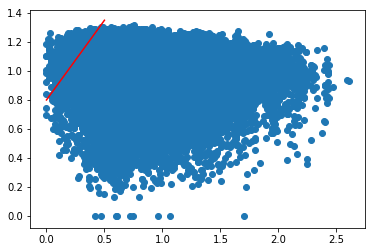

In [15]:
plt.scatter(phy[0:100000], cosine[0:100000])
x = [i * .1 for i in range(6)]
plt.plot(x,[slope * i + intercept for i in x] , color = "red")

[1.33526327 1.32580517 1.29521601 1.27690225 1.27355639 1.27327988
 1.30040277 1.32775647 1.25672926 1.25671563]
[0.      0.03006 0.      0.      0.      0.      0.03478 0.06482 0.
 0.     ]


In [73]:
print(taxa_pairs_keep[0][0])
print(taxa_pairs_keep[0][1])
print(phy_dists[taxa_pairs_keep[0][0]][taxa_pairs_keep[0][1]])
qual_vec_dists_pd[taxa_pairs_keep[0][0]][taxa_pairs_keep[0][1]]
qual_vec_dists_pd[taxa_pairs_keep[1][0]][taxa_pairs_keep[1][1]]
qual_vec_dists_pd[taxa_pairs_keep[3][0]][taxa_pairs_keep[3][1]]

JX489958
FJ437855
1.06155


1.2769022495518947

Plot qual vec dists against ko dists

In [8]:
import helper_functions as hf

ko_dists_f = open("data/AG_new/ko_dists.txt", "r")
ko_dists = ko_dists_f.read().split('\n')
ko_dists_f.close()
ko_dists = [float(i) for i in ko_dists if hf.is_number(i)]


qual_vec_dists_f = open('data/AG_new/qual_vec_dists.txt', "r")
qual_vec_dists = qual_vec_dists_f.read().split('\n')
qual_vec_dists_f.close()
qual_vec_dists = [float(i) for i in qual_vec_dists if hf.is_number(i)]

In [10]:
end_range = 10000
x = np.array(ko_dists[0:end_range])
y = np.array(qual_vec_dists[0:end_range])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [12]:
slope * np.array(x)

array([0.05195405, 0.07920216, 0.10354049, ..., 0.06950633, 0.06487407,
       0.08393023])

0.14808108016603894
0.894129054901897
Pearson Coefficient: 0.10489681266127449
Pearson P-value: 0.0


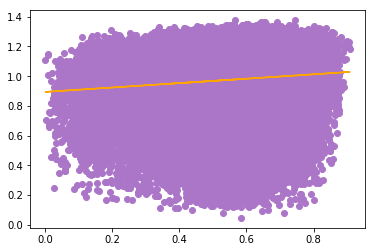

In [84]:
print(slope)
print(intercept)
line = slope*x+intercept
plt.plot(x,y,'o', color = "#AC76C8")
plt.plot(x, line, color = "orange")
#plt.xlabel("KO Distance")
#plt.ylabel("Embedding Distance")
#Correlation
corr = pearsonr(x,y)
print("Pearson Coefficient: " + str(corr[0]))
print("Pearson P-value: " + str(corr[1]))